In [1]:
# Load dataset
import pandas as pd

image_feature_train = pd.read_csv('dataset/image_feature_train.csv', header=None)[1].fillna(value='')
question_feature_train = pd.read_csv('dataset/question_feature_train.csv', header=None)[1].fillna(value='')
y_train = pd.read_csv('dataset/y_train.csv', header=None)[1].fillna(value='')

image_feature_val = pd.read_csv('dataset/image_feature_val.csv', header=None)[1].fillna(value='')
question_feature_val = pd.read_csv('dataset/question_feature_val.csv', header=None)[1].fillna(value='')
y_val = pd.read_csv('dataset/y_val.csv', header=None)[1].fillna(value='')

image_feature_test = pd.read_csv('dataset/image_feature_test.csv', header=None)[1].fillna(value='')
question_feature_test = pd.read_csv('dataset/question_feature_test.csv', header=None)[1].fillna(value='')


print(y_train.shape)
print(y_val.shape)

(20000,)
(2000,)


In [2]:
# One hot encoding
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def one_hot_transform(text):
    count = CountVectorizer()
    bag = count.fit_transform(text).toarray()
    return bag


image_feature = pd.concat([image_feature_train, image_feature_val, image_feature_test], axis=0)
question_feature = pd.concat([question_feature_train, question_feature_val, question_feature_test], axis=0)

image_feature_transformed = pd.DataFrame(one_hot_transform(image_feature))
question_feature_transformed = pd.DataFrame(one_hot_transform(question_feature))

X = pd.concat([image_feature_transformed, question_feature_transformed], axis=1)

X_train = X[:20000]
X_val = X[20000:22000]
X_test = X[22000:22100]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(20000, 3572)
(2000, 3572)
(100, 3572)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

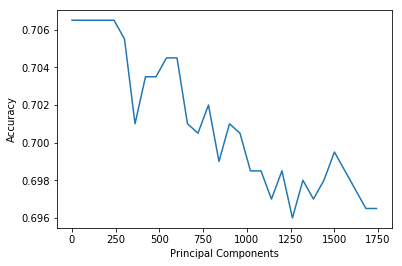

In [3]:
# Dimension reduction
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# X_train = X_train[:4000]
# y_train = y_train[:4000]

principal_com = []
accuracy = []
for i in range(1, 1800, 60):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)
    X_val_reduced = pca.transform(X_val)
    model = LogisticRegression()
    model.fit(X_train_reduced, y_train)
    y_val_predicted = model.predict(X_val_reduced)
    accuracy.append(accuracy_score(y_val, y_val_predicted))
    principal_com.append(i)
    
plt.plot(principal_com, accuracy)
plt.xlabel("Principal Components")
plt.ylabel("Accuracy")
plt.show()

In [5]:

pca = PCA(n_components=61)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)

model = LogisticRegression()
model.fit(X_train_reduced, y_train)
y_val_predicted = model.predict(X_val_reduced)

print("Accuracy on test set: {:.2f}".format(accuracy_score(y_val_predicted, y_val)))

Accuracy on test set: 0.71


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# Ensemble learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_val_reduced = pca.transform(X_val)

#logistic = LogisticRegression()
mlp = MLPClassifier(hidden_layer_sizes=(2048,4096,4096),max_iter=1000,random_state=42,activation='relu',solver='adam')
bagging = BaggingClassifier(max_samples=50)
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=500,learning_rate=0.1)
svc = SVC(random_state=42)

for model in [mlp, bagging, boost, svc]:
    model.fit(X_train_reduced, y_train)
    y_val_predicted = model.predict(X_val_reduced)
    print(accuracy_score(y_val_predicted, y_val))

In [33]:
# Predict test data

model = SVC()
model.fit(X_train_reduced, y_train)
X_test_reduced = pca.transform(X_test)
y_test_predicted = model.predict(X_test_reduced)
print(y_test_predicted)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
data = pd.DataFrame(y_test_predicted)
data.to_csv('prediction.csv', index=False, header=False)